# Load Libs

In [1]:
import tensorflow as tf

# Import Datasets

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels),(test_images, test_labels) = fashion_mnist.load_data()

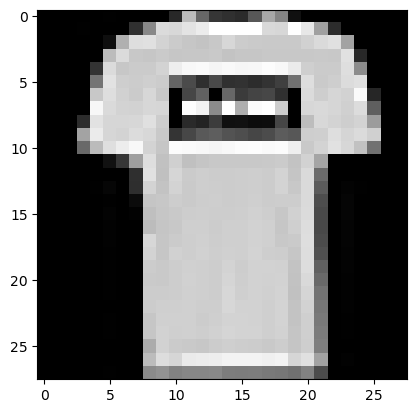

In [3]:
from matplotlib import pyplot as plt

plt.imshow(training_images[1], cmap=plt.get_cmap('gray'))
plt.show()

# Normalize Data

In [4]:
training_images = training_images/255.0
test_images = test_images/255.0

# Build NN 

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

C:\Users\kassa\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

# Train Model

In [8]:
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.7761 - loss: 0.6374
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8647 - loss: 0.3766
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8774 - loss: 0.3383
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8848 - loss: 0.3094
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8912 - loss: 0.2926


# Evaluate Model

In [9]:
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8719 - loss: 0.3485


[0.3536933958530426, 0.8729000091552734]

# Save Model

In [12]:
model.save("model_v1.keras")

# Model Loading and evaluation

In [17]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [18]:
index = 10
predictions[index]

array([3.0290751e-06, 3.9445263e-06, 3.7425607e-02, 6.5544803e-08,
       9.5626301e-01, 9.2425729e-09, 6.3042007e-03, 1.5279259e-08,
       1.0198376e-07, 2.9482846e-08], dtype=float32)

In [20]:
predicted_class_index = tf.math.argmax(predictions[index]).numpy()
predicted_class_index

4

In [21]:
# List of FashionMNIST labels, source: https://github.com/zalandoresearch/fashion-mnist
class_names = ["T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

In [22]:
predicted_class = class_names[predicted_class_index]
predicted_class

'Coat'

In [23]:
# acctual calss name
actual_class = class_names[test_labels[index]]
actual_class

'Coat'